# **TASK-2: K means clustering**
In this task we will predict the optimum number of clusters from the given ‘Iris’ dataset using K means clustering algorithm and represent it visually.

## Done by Niranjan Kumar M.

## STEP-1: Importing useful libraries

In [1]:
import numpy as np                                  #Importing Numpy library for working with multidimensional arrays 
import pandas as pd                                 #Importing pandas library for data analysis
import matplotlib.pyplot as plt                     #Importing matplotlib for data visualization
import seaborn as sns                               #importing seaborn library to visualize random distributions

## STEP-2: Reading data from given file

In [2]:
iris = pd.read_csv('Iris.csv')                      #reading data from the given csv file containing data
print('data imported')                              

data imported


In [3]:
iris.shape                                          #determining the shape of the data set

(150, 6)

In [4]:
iris.head()                                         #first 5 values in the data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()                                        #last 5 values in the data set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## STEP- 3: Finding the optimum number of clusters for K Means

In [8]:
x = iris.iloc[:, [0, 1, 2, 3]].values           #consists of "attributes" (inputs) 

In [9]:
#Finding the optimum number of clusters for k-means classification

from sklearn.cluster import KMeans

sumofsquares = []                              #sum of squares of distance from the center of cluster (centroids)
for i in range(1, 11):
    km = KMeans(init = 'k-means++', n_clusters=i , n_init = 10 , random_state =0)
    km.fit(x)
    sumofsquares.append(km.inertia_)

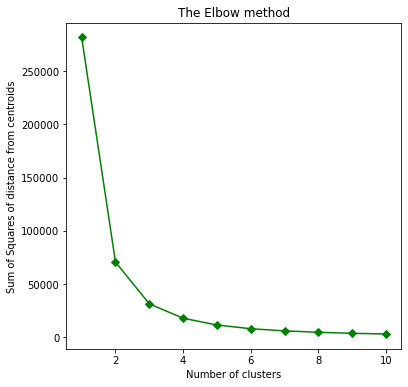

In [10]:
plt.figure(figsize=(6,6))              #Plotting the results onto a line graph for different values of K
plt.plot(np.arange(1, 11), sumofsquares, marker='D', color='green')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares of distance from centroids')
plt.show()

The graph of sum of squares of distance of data points from centroids of each clusters for each value of number of clusters is plotted. Here, the distance doesn't decrease significantly with every iteration when the number of clusters = 3, which is where the elbow point occurs.

So, the optimum number of clusters = 3 (the value of K)

In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## STEP- 4: Visualisation of clusters 

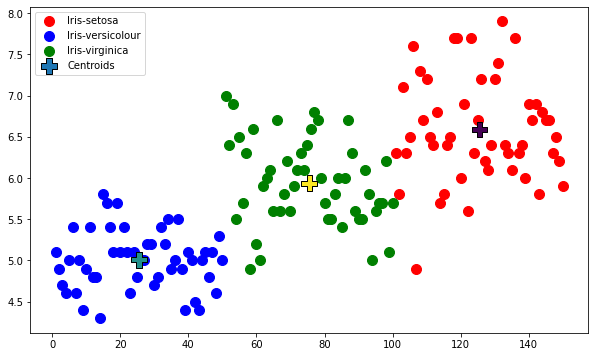

In [12]:
plt.figure(figsize=(10,6))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = 'P' , s=250 , c=[0,1,2] , edgecolors = 'k', label = 'Centroids')

plt.legend()